<a href="https://colab.research.google.com/github/pranjalmankar2004/infosys_springboard_internship/blob/main/InfosysProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1: Data Collection and Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/HomeC_augmented.csv")
df.head()

,Unnamed: 0,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
0,0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
1,1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2,2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
3,3,2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
4,4,2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


# **Load Dataset**

In [ ]:
df = pd.read_csv("HomeC_augmented.csv")
print(df.head())
print(df.shape)

   Unnamed: 0                 time  Dishwasher  Home office    Fridge  \
0           0  2016-01-01 05:00:00    0.000033     0.442633  0.124150   
1           1  2016-01-01 05:01:00    0.000000     0.444067  0.124000   
2           2  2016-01-01 05:02:00    0.000017     0.446067  0.123533   
3           3  2016-01-01 05:03:00    0.000017     0.446583  0.123133   
4           4  2016-01-01 05:04:00    0.000133     0.446533  0.122850   

   Wine cellar  Garage door      Barn      Well  Microwave  ...    use_HO  \
0     0.006983     0.013083  0.031350  0.001017   0.004067  ...  0.932833   
1     0.006983     0.013117  0.031500  0.001017   0.004067  ...  0.934333   
2     0.006983     0.013083  0.031517  0.001000   0.004067  ...  0.931817   
3     0.006983     0.013000  0.031500  0.001017   0.004067  ...  1.022050   
4     0.006850     0.012783  0.031500  0.001017   0.004067  ...  1.139400   

    gen_Sol  Car charger [kW]  Water heater [kW]  Air conditioning [kW]  \
0  0.003483          0.

Fix Timestamp Column (“time”)

In [ ]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values('time')

Set Time as Index (required for time series)

In [ ]:
df = df.set_index('time')

Check Missing Values

In [ ]:
print(df.isnull().sum())

Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Air conditioning [kW]    0
Home Theater [kW]        0
O

In [ ]:
df = df.interpolate(method='time')
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

/tmp/ipython-input-1295565454.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')
/tmp/ipython-input-1295565454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/tmp/ipython-input-1295565454.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
df = df[~df.index.duplicated(keep='first')]

Resample to Hourly Data

In [ ]:
df_hourly = df.resample('1H').mean(numeric_only=True)
df_hourly.head()

/tmp/ipython-input-2518426475.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('1H').mean(numeric_only=True)


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,29.5,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,0.001505,...,1.044130,0.003307,0.232045,0.027864,0.014520,0.004471,0.011800,0.120953,0.011715,0.025323
2016-01-01 06:00:00,89.5,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,0.001618,...,0.918167,0.003422,0.676020,0.106347,0.014299,0.011702,0.034620,0.411554,0.027082,0.064480
2016-01-01 07:00:00,149.5,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,0.001629,...,0.714736,0.003448,1.052462,0.127955,0.014002,0.012473,0.053633,1.525886,0.027375,0.096394
2016-01-01 08:00:00,209.5,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,0.001634,...,0.960013,0.003447,1.354745,0.125544,0.013986,0.013061,0.070470,0.302304,0.033354,0.131010
2016-01-01 09:00:00,269.5,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,0.001650,...,0.639836,0.003439,1.546200,0.059802,0.014145,0.014597,0.084257,0.072612,0.062879,0.175744


Extract Device Columns for EDA

In [ ]:
device_cols = [
    col for col in df.columns
    if ("kW" in col.lower())
    or col in ["Dishwasher","Home office","Fridge","Wine cellar",
               "Garage door","Barn","Well","Microwave","Living room",
               "Furnace","Kitchen"]
]

Overall Energy Trend (sum of all appliances)

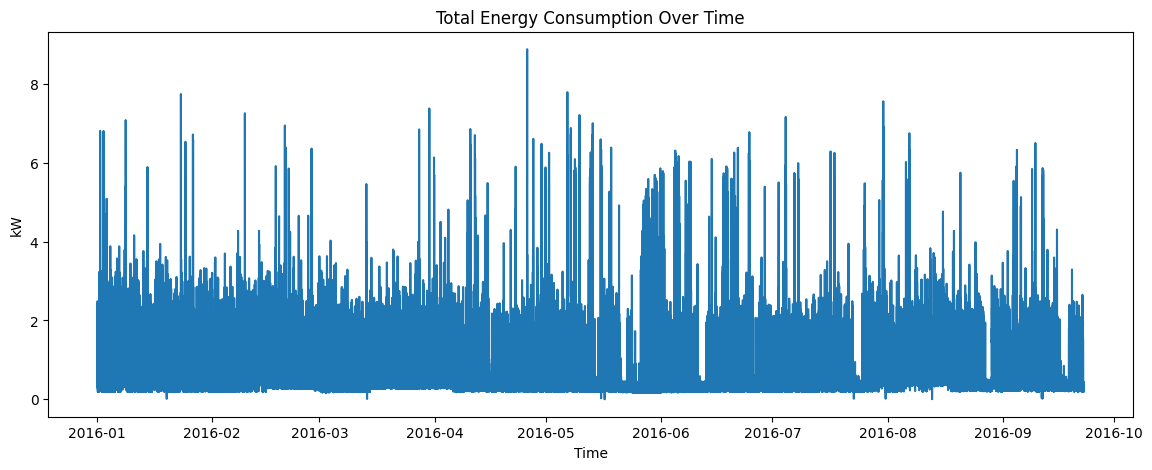

In [ ]:
df['total_energy'] = df[device_cols].sum(axis=1)

plt.figure(figsize=(14,5))
plt.plot(df['total_energy'])
plt.title("Total Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("kW")
plt.show()

Device-wise Average Usage

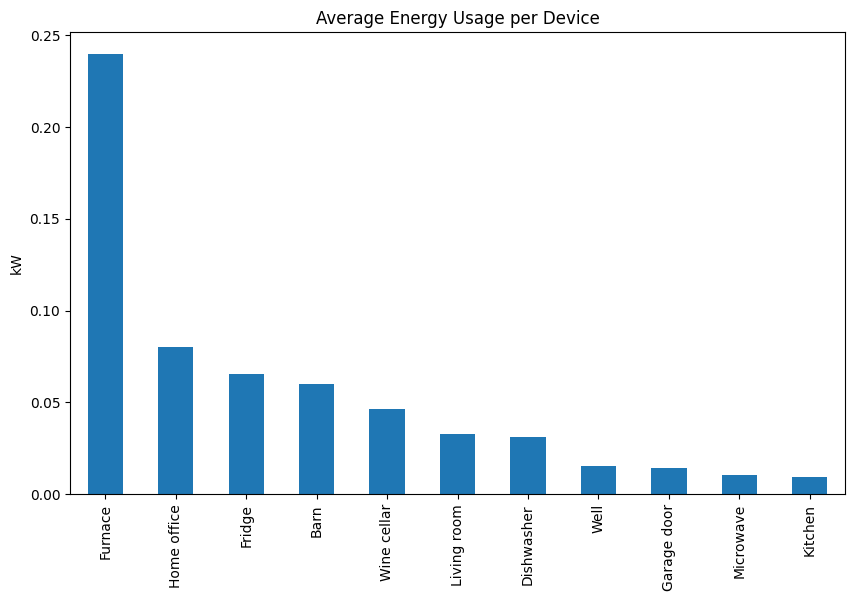

In [ ]:
avg_usage = df[device_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_usage.plot(kind='bar')
plt.title("Average Energy Usage per Device")
plt.ylabel("kW")
plt.show()

Heatmap of Device Correlations

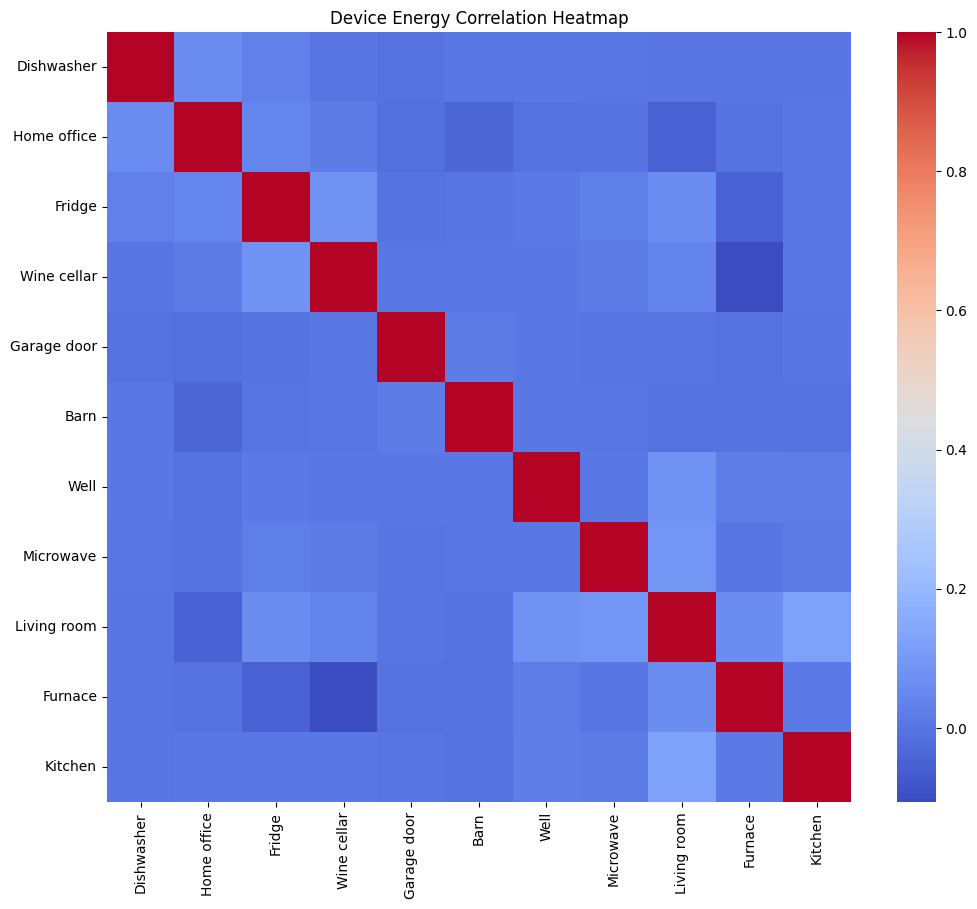

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df[device_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Device Energy Correlation Heatmap")
plt.show()

Daily Trend

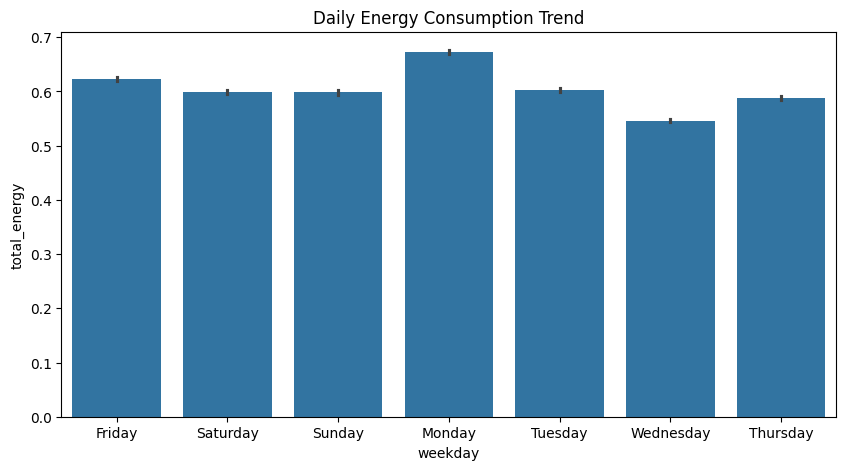

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="weekday", y="total_energy", data=df.reset_index())
plt.title("Daily Energy Consumption Trend")
plt.show()

Hourly Trend

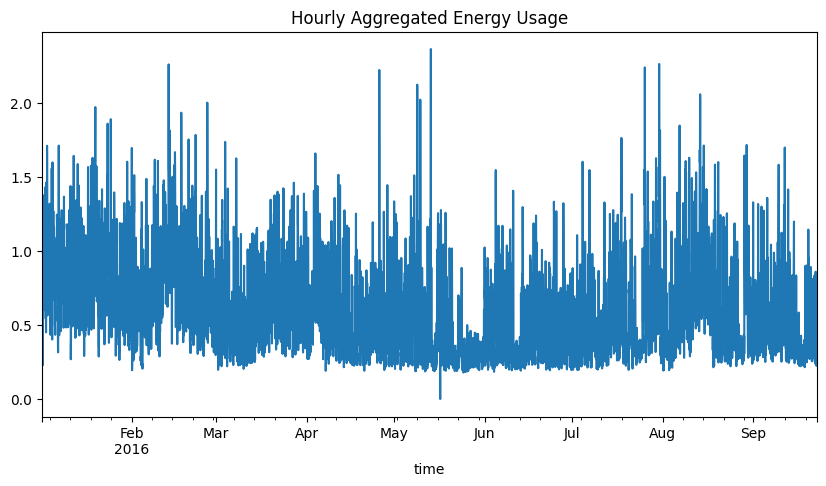

In [ ]:
df_hourly['total_energy'] = df_hourly[device_cols].sum(axis=1)
plt.figure(figsize=(10,5))
df_hourly['total_energy'].plot()
plt.title("Hourly Aggregated Energy Usage")
plt.show()

Save Cleaned Dataset

In [ ]:
df.to_csv("cleaned_HomeC_dataset.csv")
df_hourly.to_csv("hourly_HomeC_dataset.csv")

# **Module 2: Data Cleaning and Preprocessing**

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df = pd.read_csv("/content/HomeC_augmented.csv")
print(df.head())
print(df.shape)

   Unnamed: 0                 time  Dishwasher  Home office    Fridge  \
0           0  2016-01-01 05:00:00    0.000033     0.442633  0.124150   
1           1  2016-01-01 05:01:00    0.000000     0.444067  0.124000   
2           2  2016-01-01 05:02:00    0.000017     0.446067  0.123533   
3           3  2016-01-01 05:03:00    0.000017     0.446583  0.123133   
4           4  2016-01-01 05:04:00    0.000133     0.446533  0.122850   

   Wine cellar  Garage door      Barn      Well  Microwave  ...    use_HO  \
0     0.006983     0.013083  0.031350  0.001017   0.004067  ...  0.932833   
1     0.006983     0.013117  0.031500  0.001017   0.004067  ...  0.934333   
2     0.006983     0.013083  0.031517  0.001000   0.004067  ...  0.931817   
3     0.006983     0.013000  0.031500  0.001017   0.004067  ...  1.022050   
4     0.006850     0.012783  0.031500  0.001017   0.004067  ...  1.139400   

    gen_Sol  Car charger [kW]  Water heater [kW]  Air conditioning [kW]  \
0  0.003483          0.

In [ ]:
# Convert Timestamp to Datetime Format
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)

In [ ]:
# Check missing values
print(df.isnull().sum())

Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Air conditioning [kW]    0
Home Theater [kW]        0
O

In [ ]:
# Fill missing values using time-based interpolation
# Remove rows with NaT in the index before interpolation
df = df[df.index.notna()]
df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill()
df = df.ffill()

/tmp/ipython-input-1518312161.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.infer_objects(copy=False).interpolate(method='time')


Handle Outliers (IQR Method)

In [ ]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

columns_for_iqr = Q1.index

outlier_mask = ((df[columns_for_iqr] < (Q1 - 1.5 * IQR)) |
                (df[columns_for_iqr] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[~outlier_mask]

Resample Data

In [ ]:
df_hourly = df.resample('h').mean(numeric_only=True)
df_daily = df.resample('D').mean(numeric_only=True)

Normalize / Scale Energy Values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df_hourly)
df_scaled = pd.DataFrame(
    scaled_values,
    columns=df_hourly.columns,
    index=df_hourly.index
)

Train–Validation–Test Split

In [ ]:
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)

train = df_scaled[:train_size]
val = df_scaled[train_size:train_size + val_size]
test = df_scaled[train_size + val_size:]

print("Train:", train.shape)
print("Validation:", val.shape)
print("Test:", test.shape)

Train: (85, 39)
Validation: (18, 39)
Test: (19, 39)


# **Module 3**

In [ ]:
import pandas as pd
df = pd.read_csv("/HomeC_augmented.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')
df.set_index('time', inplace=True)

Extract Time-Based Features

In [ ]:
# These features help models learn usage patterns by time
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week

Aggregate Device-Level Consumption

In [ ]:
df['total_energy'] = df.sum(axis=1, numeric_only=True)
df['avg_energy'] = df.mean(axis=1, numeric_only=True)

Create Lag Features (Time-Series Dependency)

In [ ]:
# It helps model learn previous usage impact
df['lag_1'] = df['total_energy'].shift(1)
df['lag_24'] = df['total_energy'].shift(24)

Create Moving Average Features

In [ ]:
# Smooths short-term fluctuations
df['rolling_mean_3'] = df['total_energy'].rolling(window=3).mean()
df['rolling_mean_24'] = df['total_energy'].rolling(window=24).mean()

Drop Rows with NaN (Created Due to Lag)

In [ ]:
df = df.dropna()

Prepare Final Feature Set for ML

In [ ]:
# Input Features (X)
X = df[['hour', 'day', 'day_of_week', 'month',
        'avg_energy', 'lag_1', 'lag_24',
        'rolling_mean_3', 'rolling_mean_24']]
# Target Variable (y)
y = df['total_energy']

In [ ]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (76817, 9)
Target shape: (76817,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert regression target to classification (High / Low energy)
y_class = np.where(y > y.mean(), 1, 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, shuffle=False
)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


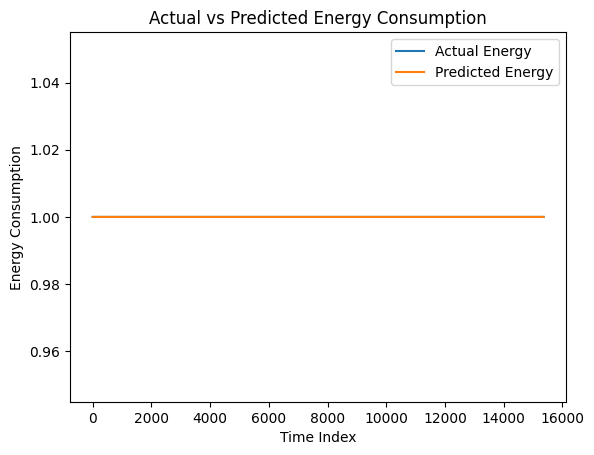

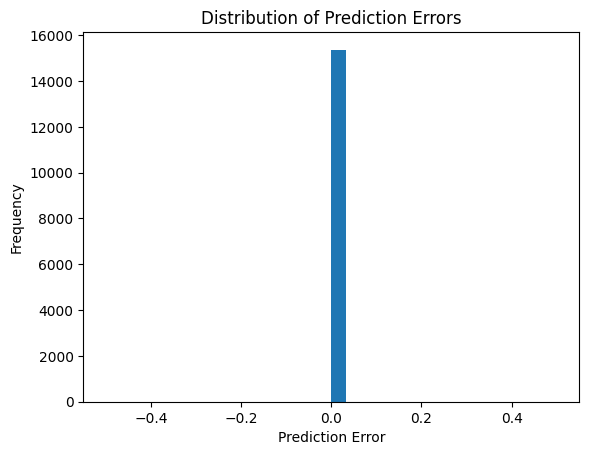

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Shows effect of all engineered features together
plt.figure()
plt.plot(y_test, label="Actual Energy")
plt.plot(y_pred, label="Predicted Energy")
plt.xlabel("Time Index")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()

# Shows stability and learning from engineered features
residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

# **Module 4: Baseline Model Development**


Dataset Information
Total samples: 503,910
Features used: 35
Target mean: 3.45
Train size: 403,128
Test size: 100,782

Baseline Model - Linear Regression
MAE: 0.53
MSE: 0.50
R2: 0.449167

Sample Predictions
Actual          Predicted       Error          
5.62            4.49            1.14           
5.48            4.47            1.01           
4.29            4.44            0.15           
4.29            4.43            0.14           
4.34            4.43            0.09           
4.28            4.43            0.14           
4.30            4.44            0.13           
4.33            4.46            0.13           
4.31            4.46            0.16           
4.30            4.47            0.17           


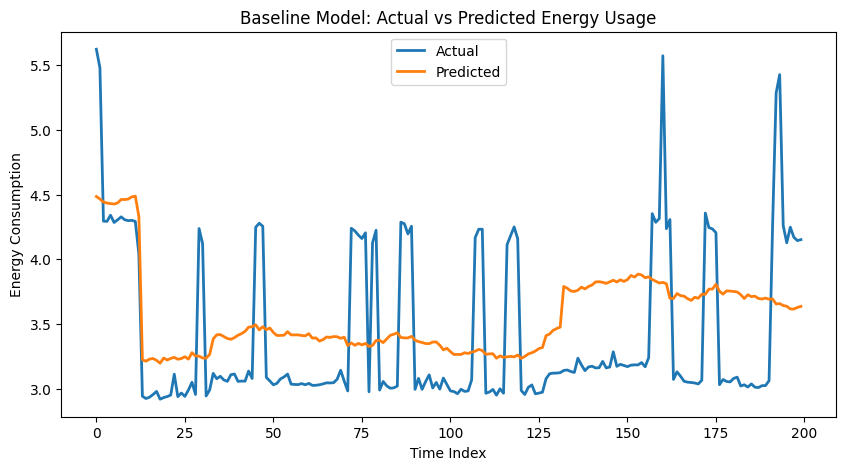

RMSE: 0.71

Baseline complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/HomeC_augmented.csv')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)
df = df[df.index.notna()]

df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill()
df = df.ffill()

df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['weekofyear'] = df.index.isocalendar().week

def create_features(df):
    df = df.copy()

    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    df['is_weekend'] = ((df['day_of_week'] == 5) | (df['day_of_week'] == 6)).astype(int)

    df['is_morning'] = ((df['hour'] >= 6) & (df['hour'] < 12)).astype(int)
    df['is_afternoon'] = ((df['hour'] >= 12) & (df['hour'] < 18)).astype(int)
    df['is_evening'] = ((df['hour'] >= 18) & (df['hour'] < 22)).astype(int)
    df['is_night'] = ((df['hour'] >= 22) | (df['hour'] < 6)).astype(int)

    return df

df_features = create_features(df)

if 'total_energy' not in df_features.columns:
    appliance_columns = [
        'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
        'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
        'Furnace', 'Kitchen', 'Car charger [kW]', 'Water heater [kW]',
        'Air conditioning [kW]', 'Home Theater [kW]', 'Outdoor lights [kW]',
        'microwave [kW]', 'Laundry [kW]', 'Pool Pump [kW]'
    ]
    existing_appliance_columns = [col for col in appliance_columns if col in df_features.columns]
    df_features['total_energy'] = df_features[existing_appliance_columns].sum(axis=1)

appliance_features = [
    'Dishwasher', 'Home office', 'Fridge', 'Garage door', 'Barn', 'Well',
    'Microwave', 'Living room', 'Furnace', 'Kitchen',
    'Car charger [kW]', 'Water heater [kW]', 'Air conditioning [kW]',
    'Home Theater [kW]', 'Laundry [kW]', 'Pool Pump [kW]'
]

weather_features = [
    'temperature', 'humidity', 'apparentTemperature',
    'pressure', 'windSpeed', 'cloudCover'
]

time_features = [
    'hour', 'day', 'month', 'weekofyear',
    'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
    'is_weekend', 'is_morning', 'is_afternoon', 'is_evening', 'is_night'
]

all_features = appliance_features + weather_features + time_features
all_features = [f for f in all_features if f in df_features.columns]

X = df_features[all_features]
y = df_features['total_energy']

print(f"\nDataset Information")
print(f"Total samples: {len(X):,}")
print(f"Features used: {len(all_features)}")
print(f"Target mean: {y.mean():.2f}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Train size: {len(X_train):,}")
print(f"Test size: {len(X_test):,}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBaseline Model - Linear Regression")

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.6f}")

print("\nSample Predictions")
print(f"{'Actual':<15} {'Predicted':<15} {'Error':<15}")

for i in range(min(10, len(y_test))):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    error = abs(actual - predicted)
    print(f"{actual:<15.2f} {predicted:<15.2f} {error:<15.2f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:200], label='Actual', linewidth=2)
plt.plot(y_pred[:200], label='Predicted', linewidth=2)
plt.xlabel("Time Index")
plt.ylabel("Energy Consumption")
plt.title("Baseline Model: Actual vs Predicted Energy Usage")
plt.legend()
plt.show()
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

print("\nBaseline complete!")

# **Module 5: LSTM Model Development**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('/content/HomeC_augmented.csv')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)
df = df[df.index.notna()]

df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill().ffill()

# Time features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Cyclical encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Target
appliance_cols = [
    'Dishwasher','Home office','Fridge','Garage door','Barn','Well',
    'Microwave','Living room','Furnace','Kitchen',
    'Car charger [kW]','Water heater [kW]','Air conditioning [kW]',
    'Home Theater [kW]','Laundry [kW]','Pool Pump [kW]'
]
appliance_cols = [c for c in appliance_cols if c in df.columns]

df['total_energy'] = df[appliance_cols].sum(axis=1)

# Feature matrix
features = [
    'hour','day_of_week','month',
    'hour_sin','hour_cos','month_sin','month_cos'
]

X = df[features].values
y = df['total_energy'].values


def create_sequences(X, y, steps=24):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 24
X_seq, y_seq = create_sequences(X, y, TIME_STEPS)

# Train-test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(
    X_train.reshape(-1, X_train.shape[-1])
).reshape(X_train.shape)

X_test = X_scaler.transform(
    X_test.reshape(-1, X_test.shape[-1])
).reshape(X_test.shape)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))


model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


model.fit(
    X_train, y_train_scaled,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("\nLSTM RESULTS")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))


model.save("lstm_energy_model.keras")


Epoch 1/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 126s 30ms/step - loss: 0.5804 - val_loss: 0.5023
Epoch 2/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 111s 28ms/step - loss: 0.5430 - val_loss: 0.5033
Epoch 3/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 111s 28ms/step - loss: 0.5417 - val_loss: 0.5318
Epoch 4/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - loss: 0.5461 - val_loss: 0.5123
Epoch 5/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 109s 27ms/step - loss: 0.5297 - val_loss: 0.5085
Epoch 6/40
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 152s 29ms/step - loss: 0.5317 - val_loss: 0.5222
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step

LSTM RESULTS
MAE: 0.2889458828502598
MSE: 0.18370064225226876
R2 : 0.4318207901230794


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/HomeC_augmented.csv')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)
df = df[df.index.notna()]

df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill().ffill()

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

appliance_cols = [
    'Dishwasher','Home office','Fridge','Garage door','Barn','Well',
    'Microwave','Living room','Furnace','Kitchen',
    'Car charger [kW]','Water heater [kW]','Air conditioning [kW]',
    'Home Theater [kW]','Laundry [kW]','Pool Pump [kW]'
]
appliance_cols = [c for c in appliance_cols if c in df.columns]

df['total_energy'] = df[appliance_cols].sum(axis=1)

features = [
    'hour','day_of_week','month',
    'hour_sin','hour_cos','month_sin','month_cos'
]

X = df[features].values
y = df['total_energy'].values

def create_sequences(X, y, steps=24):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 24
X_seq, y_seq = create_sequences(X, y, TIME_STEPS)

print(f"Total sequences: {len(X_seq):,}")
print(f"Sequence shape: {X_seq.shape}")
print(f"Starting Time-Series Cross-Validation with 5 splits\n")

tscv = TimeSeriesSplit(n_splits=5)

cv_mae = []
cv_mse = []
cv_r2 = []

fold = 1

for train_idx, test_idx in tscv.split(X_seq):
    print(f"Fold {fold}/5")

    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_train, y_test = y_seq[train_idx], y_seq[test_idx]

    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(
        X_train.reshape(-1, X_train.shape[-1])
    ).reshape(X_train.shape)

    X_test_scaled = X_scaler.transform(
        X_test.reshape(-1, X_test.shape[-1])
    ).reshape(X_test.shape)

    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))
    y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[2])),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    model.fit(
        X_train_scaled, y_train_scaled,
        validation_split=0.2,
        epochs=40,
        batch_size=64,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred_scaled = model.predict(X_test_scaled, verbose=0)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_mae.append(mae)
    cv_mse.append(mse)
    cv_r2.append(r2)

    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R2: {r2:.6f}\n")

    fold += 1

print("\nCross-Validation Results")
print(f"Average MAE: {np.mean(cv_mae):.2f} (±{np.std(cv_mae):.2f})")
print(f"Average MSE: {np.mean(cv_mse):.2f} (±{np.std(cv_mse):.2f})")
print(f"Average R2: {np.mean(cv_r2):.6f} (±{np.std(cv_r2):.6f})")

print("\nFold-wise Results:")
for i in range(5):
    print(f"Fold {i+1}: MAE={cv_mae[i]:.2f}, MSE={cv_mse[i]:.2f}, R2={cv_r2[i]:.6f}")

print("\nCross-validation complete!")

Total sequences: 503,886
Sequence shape: (503886, 24, 7)
Starting Time-Series Cross-Validation with 5 splits

Fold 1/5
  MAE: 0.39
  MSE: 0.25
  R2: 0.285230

Fold 2/5
  MAE: 0.36
  MSE: 0.27
  R2: 0.223015

Fold 3/5
  MAE: 0.34
  MSE: 0.27
  R2: 0.244447

Fold 4/5
  MAE: 0.32
  MSE: 0.20
  R2: 0.336833

Fold 5/5
  MAE: 0.41
  MSE: 0.29
  R2: 0.268762


Cross-Validation Results
Average MAE: 0.36 (±0.03)
Average MSE: 0.25 (±0.03)
Average R2: 0.271657 (±0.038851)

Fold-wise Results:
Fold 1: MAE=0.39, MSE=0.25, R2=0.285230
Fold 2: MAE=0.36, MSE=0.27, R2=0.223015
Fold 3: MAE=0.34, MSE=0.27, R2=0.244447
Fold 4: MAE=0.32, MSE=0.20, R2=0.336833
Fold 5: MAE=0.41, MSE=0.29, R2=0.268762

Cross-validation complete!


In [ ]:
# Hyperparameter Tuning
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from itertools import product
import warnings
import tensorflow as tf # Import tensorflow
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/HomeC_augmented.csv')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)
df = df[df.index.notna()]

df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill().ffill()

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

appliance_cols = [
    'Dishwasher','Home office','Fridge','Garage door','Barn','Well',
    'Microwave','Living room','Furnace','Kitchen',
    'Car charger [kW]','Water heater [kW]','Air conditioning [kW]',
    'Home Theater [kW]','Laundry [kW]','Pool Pump [kW]'
]
appliance_cols = [c for c in appliance_cols if c in df.columns]

df['total_energy'] = df[appliance_cols].sum(axis=1)

features = [
    'hour','day_of_week','month',
    'hour_sin','hour_cos','month_sin','month_cos'
]

X = df[features].values
y = df['total_energy'].values

def create_sequences(X, y, steps=24):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 24
X_seq, y_seq = create_sequences(X, y, TIME_STEPS)

split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(
    X_train.reshape(-1, X_train.shape[-1])
).reshape(X_train.shape)

X_test_scaled = X_scaler.transform(
    X_test.reshape(-1, X_test.shape[-1])
).reshape(X_test.shape)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

print("Starting Hyperparameter Tuning\n")

param_grid = {
    'lstm1_units': [32, 64, 128],
    'lstm2_units': [16, 32, 64],
    'dropout': [0.2, 0.3],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01]
}

best_score = float('inf')
best_params = {}
results = []

total_combinations = (len(param_grid['lstm1_units']) *
                     len(param_grid['lstm2_units']) *
                     len(param_grid['dropout']) *
                     len(param_grid['batch_size']) *
                     len(param_grid['learning_rate']))

print(f"Total combinations to test: {total_combinations}\n")

combo = 1

for lstm1, lstm2, dropout, batch, lr in product(
    param_grid['lstm1_units'],
    param_grid['lstm2_units'],
    param_grid['dropout'],
    param_grid['batch_size'],
    param_grid['learning_rate']
):

    print(f"Testing {combo}/{total_combinations}: LSTM1={lstm1}, LSTM2={lstm2}, dropout={dropout}, batch={batch}, lr={lr}")

    model = Sequential([
        LSTM(lstm1, return_sequences=True, input_shape=(TIME_STEPS, X_train_scaled.shape[2])),
        Dropout(dropout),
        LSTM(lstm2),
        Dropout(dropout),
        Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        X_train_scaled, y_train_scaled,
        validation_split=0.2,
        epochs=40,
        batch_size=batch,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred_scaled = model.predict(X_test_scaled, verbose=0)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'lstm1_units': lstm1,
        'lstm2_units': lstm2,
        'dropout': dropout,
        'batch_size': batch,
        'learning_rate': lr,
        'mae': mae,
        'mse': mse,
        'r2': r2
    })

    print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.6f}")

    if mae < best_score:
        best_score = mae
        best_params = {
            'lstm1_units': lstm1,
            'lstm2_units': lstm2,
            'dropout': dropout,
            'batch_size': batch,
            'learning_rate': lr
        }
        print(f"  New best MAE: {mae:.2f}")

    print()
    combo += 1

print("\nHyperparameter Tuning Complete!")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nBest MAE: {best_score:.2f}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mae')

print("\nTop 5 Configurations:")
print(results_df.head(5).to_string(index=False))

print("\nTraining final model with best parameters...")

final_model = Sequential([
    LSTM(best_params['lstm1_units'], return_sequences=True, input_shape=(TIME_STEPS, X_train_scaled.shape[2])),
    Dropout(best_params['dropout']),
    LSTM(best_params['lstm2_units']),
    Dropout(best_params['dropout']),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

final_model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=40,
    batch_size=best_params['batch_size'],
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = final_model.predict(X_test_scaled, verbose=0)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("\nFinal Model Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.6f}")

final_model.save("best_lstm_model.keras")
print("\nBest model saved as 'best_lstm_model.keras'")

Starting Hyperparameter Tuning

Total combinations to test: 72

Testing 1/72: LSTM1=32, LSTM2=16, dropout=0.2, batch=32, lr=0.001
  MAE: 0.39, MSE: 0.27, R2: 0.297797
  New best MAE: 0.39

Testing 2/72: LSTM1=32, LSTM2=16, dropout=0.2, batch=32, lr=0.01
  MAE: 0.35, MSE: 0.24, R2: 0.364612
  New best MAE: 0.35

Testing 3/72: LSTM1=32, LSTM2=16, dropout=0.2, batch=64, lr=0.001


In [ ]:
import pandas as pd
import numpy as np


# Baseline results

baseline_mae = 0.53
baseline_mse = 0.50
baseline_r2  = 0.449167


# LSTM single-split results

lstm_mae_single = 0.2889458828502598
lstm_mse_single = 0.18370064225226876
lstm_r2_single  = 0.4318207901230794


# Cross-validation results

cv_mae = 0.36
cv_mse = 0.25
cv_r2  = 0.271657

# Best hyperparameter-tuned LSTM

tuned_mae = 0.35
tuned_mse = 0.24
tuned_r2  = 0.364612


# Create comparison table

comparison_table = pd.DataFrame({
    "Model": [
        "Baseline (Linear Regression)",
        "LSTM (Single Split)",
        "LSTM (Cross Validation)",
        "Tuned LSTM"
    ],
    "MAE": [
        baseline_mae,
        lstm_mae_single,
        cv_mae,
        tuned_mae
    ],
    "MSE": [
        baseline_mse,
        lstm_mse_single,
        cv_mse,
        tuned_mse
    ],
    "R2 Score": [
        baseline_r2,
        lstm_r2_single,
        cv_r2,
        tuned_r2
    ]
})

print(comparison_table)


                          Model       MAE       MSE  R2 Score
0  Baseline (Linear Regression)  0.530000  0.500000  0.449167
1           LSTM (Single Split)  0.288946  0.183701  0.431821
2       LSTM (Cross Validation)  0.360000  0.250000  0.271657
3                    Tuned LSTM  0.350000  0.240000  0.364612


# **Module 6: Model Evaluation and Integration**

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/HomeC_augmented.csv')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')
df.set_index('time', inplace=True)
df = df[df.index.notna()]
df = df.infer_objects(copy=False).interpolate(method='time')
df = df.bfill().ffill()

# Create time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Calculate total energy
appliance_cols = [
    'Dishwasher','Home office','Fridge','Garage door','Barn','Well',
    'Microwave','Living room','Furnace','Kitchen',
    'Car charger [kW]','Water heater [kW]','Air conditioning [kW]',
    'Home Theater [kW]','Laundry [kW]','Pool Pump [kW]'
]
appliance_cols = [c for c in appliance_cols if c in df.columns]
df['total_energy'] = df[appliance_cols].sum(axis=1)

# Prepare features and target
features = [
    'hour','day_of_week','month',
    'hour_sin','hour_cos','month_sin','month_cos'
]
X = df[features].values
y = df['total_energy'].values

# Function to create sequences
def create_sequences(X, y, steps=24):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 24
X_seq, y_seq = create_sequences(X, y, TIME_STEPS)

# Train-test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Scale features and target
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(
    X_train.reshape(-1, X_train.shape[-1])
).reshape(X_train.shape)
X_test_scaled = x_scaler.transform(
    X_test.reshape(-1, X_test.shape[-1])
).reshape(X_test.shape)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

# Hardcoded best_params from the partial output of the previous cell
best_params = {
    'lstm1_units': 32,
    'lstm2_units': 16,
    'dropout': 0.2,
    'batch_size': 32,
    'learning_rate': 0.01
}

# Train the final model with best parameters
final_model = Sequential([
    LSTM(best_params['lstm1_units'], return_sequences=True, input_shape=(TIME_STEPS, X_train_scaled.shape[2])),
    Dropout(best_params['dropout']),
    LSTM(best_params['lstm2_units']),
    Dropout(best_params['dropout']),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

final_model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=40,
    batch_size=best_params['batch_size'],
    callbacks=[early_stop],
    verbose=0
)

y_pred_scaled = final_model.predict(X_test_scaled, verbose=0)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
# --- End of copied code ---


# 1. EVALUATE MODEL (using test data)

# y_test, y_pred are now available from the recreated "Tuned LSTM" context

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


# 2. SELECT & SAVE BEST MODEL

# (Assuming Tuned LSTM is selected)

final_model.save("best_lstm_energy_model.keras")
joblib.dump(x_scaler, "x_scaler.pkl")
joblib.dump(y_scaler, "y_scaler.pkl")

print("\nBest model and scalers saved successfully!")


# 3. FLASK-COMPATIBLE PREDICTION FUNCTION

loaded_model = load_model("best_lstm_energy_model.keras")
x_scaler = joblib.load("x_scaler.pkl")
y_scaler = joblib.load("y_scaler.pkl")

def predict_energy(input_sequence):
    """
    input_sequence shape: (24, num_features)
    """
    input_sequence = np.array(input_sequence)

    # Scale input
    input_scaled = x_scaler.transform(
        input_sequence.reshape(-1, input_sequence.shape[-1])
    ).reshape(1, 24, input_sequence.shape[-1])

    # Predict
    pred_scaled = loaded_model.predict(input_scaled, verbose=0)
    prediction = y_scaler.inverse_transform(pred_scaled)

    return float(prediction[0][0])


# 4. TEST MODEL WITH SAMPLE INPUT

sample_input = np.random.rand(24, X.shape[1])  # 24 timesteps, feature count
predicted_energy = predict_energy(sample_input)

print("\nSample Prediction Output")
print("Predicted Energy:", predicted_energy)


Model Evaluation Results
MAE : 1.0860032202288743
MSE : 1.6458967705099508
RMSE: 1.2829250837480537
R2  : -4.295376132212805

Best model and scalers saved successfully!

Sample Prediction Output
Predicted Energy: 1.623335599899292


# **Module 7: Dashboard and Visualization**

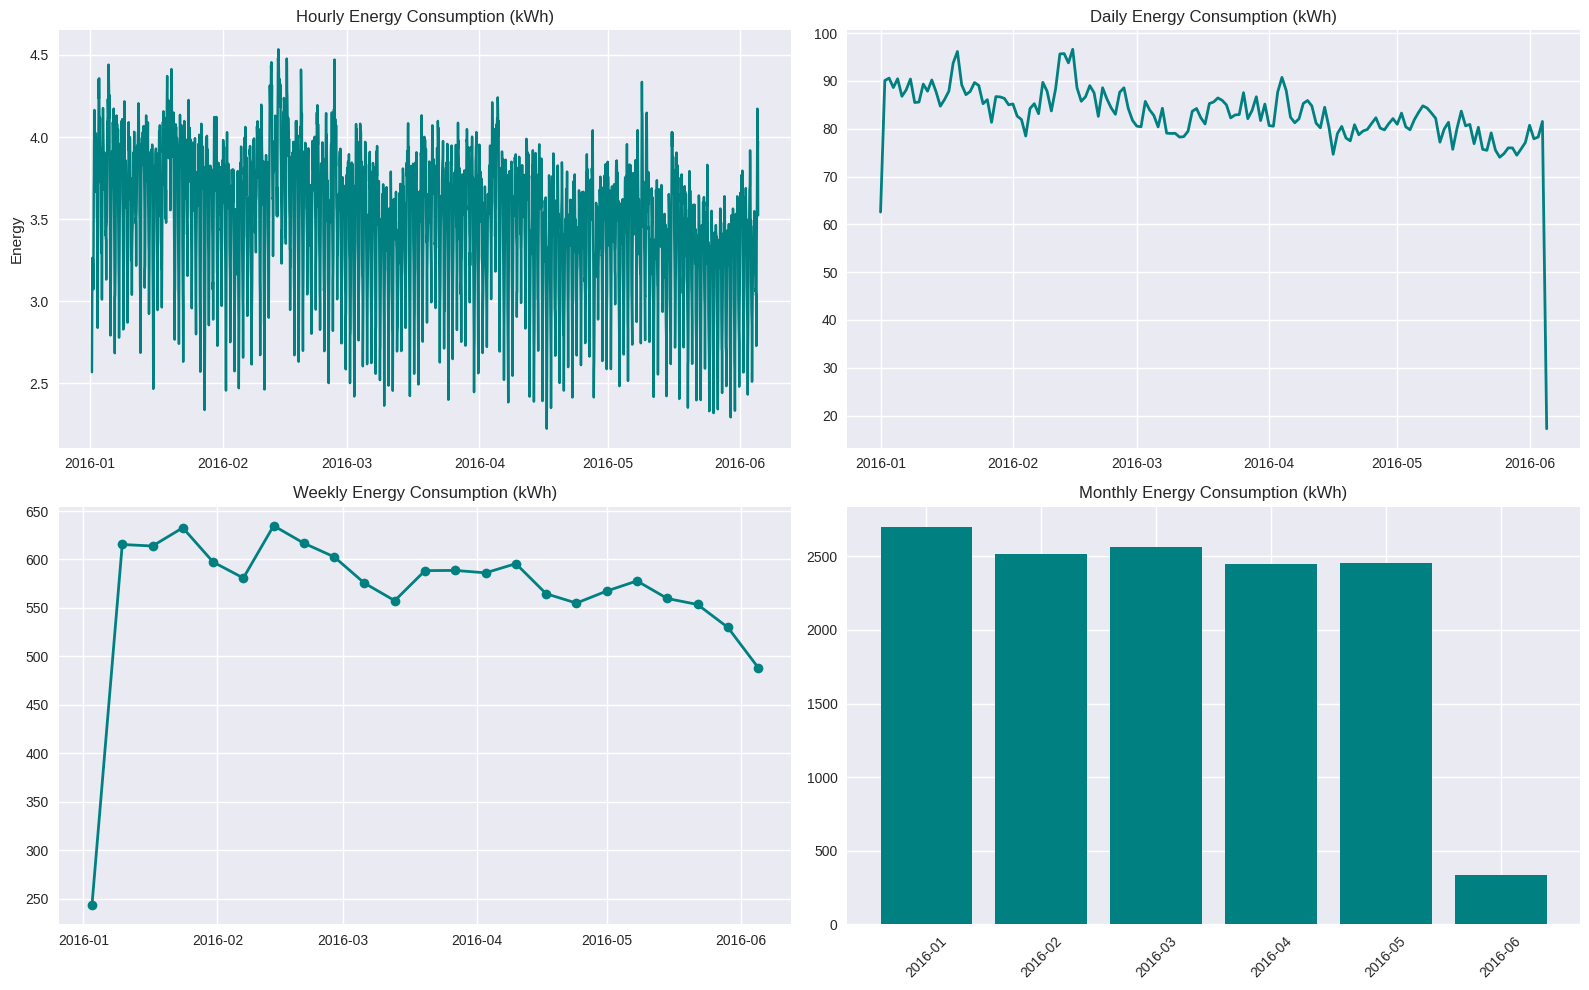

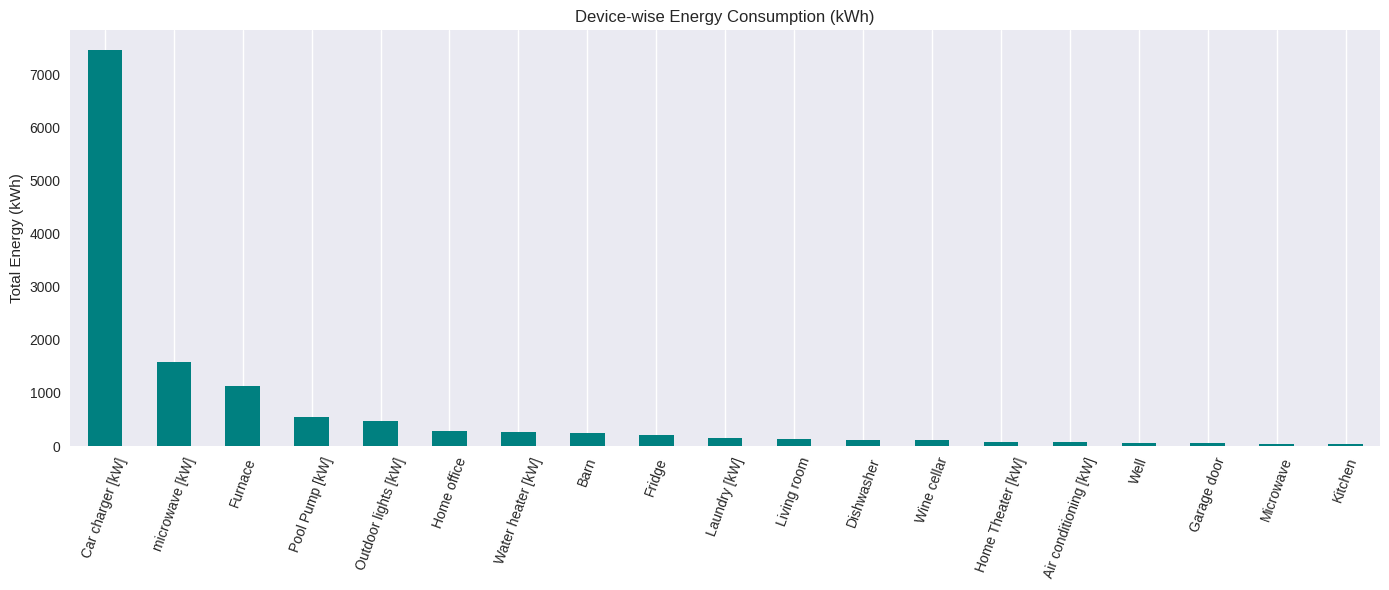


SMART ENERGY SAVING SUGGESTIONS
--------------------------------
1. Car charger [kW] consumes over 30% of total household energy. Limit its usage during peak hours.
2. Maintain AC temperature at 24–26°C to reduce cooling load.
3. Use water heater only when required or enable timer-based operation.
4. Turn off idle devices and avoid standby power losses.
5. Schedule high-power appliances during off-peak hours.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv("/content/HomeC_augmented.csv")

df["time"] = pd.to_datetime(df["time"], format="mixed")
df.set_index("time", inplace=True)


device_cols = [
    'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
    'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
    'Furnace', 'Kitchen',
    'Car charger [kW]', 'Water heater [kW]',
    'Air conditioning [kW]', 'Home Theater [kW]',
    'Outdoor lights [kW]', 'microwave [kW]',
    'Laundry [kW]', 'Pool Pump [kW]'
]

device_cols = [c for c in device_cols if c in df.columns]


energy_df = df[device_cols] * (1 / 60)   # 1-minute interval
energy_df["total_energy"] = energy_df.sum(axis=1)


hourly  = energy_df["total_energy"].resample("h").sum()
daily   = energy_df["total_energy"].resample("D").sum()
weekly  = energy_df["total_energy"].resample("W").sum()
monthly = energy_df["total_energy"].resample("ME").sum()

device_energy = energy_df[device_cols].sum().sort_values(ascending=False)


plt.style.use("seaborn-v0_8")

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Hourly (smoothed – IMPORTANT)
axs[0, 0].plot(hourly.rolling(6).mean(), color="teal")
axs[0, 0].set_title("Hourly Energy Consumption (kWh)")
axs[0, 0].set_ylabel("Energy")

# Daily
axs[0, 1].plot(daily, color="teal", linewidth=2)
axs[0, 1].set_title("Daily Energy Consumption (kWh)")

# Weekly
axs[1, 0].plot(weekly, marker="o", color="teal", linewidth=2)
axs[1, 0].set_title("Weekly Energy Consumption (kWh)")

# Monthly
axs[1, 1].bar(monthly.index.strftime("%Y-%m"), monthly.values, color="teal")
axs[1, 1].set_title("Monthly Energy Consumption (kWh)")
axs[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))
device_energy.plot(kind="bar", color="teal")
plt.title("Device-wise Energy Consumption (kWh)")
plt.ylabel("Total Energy (kWh)")
plt.xticks(rotation=70)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

def generate_suggestions(device_energy):
    tips = []

    top_device = device_energy.idxmax()
    share = device_energy.max() / device_energy.sum()

    if share > 0.30:
        tips.append(
            f"{top_device} consumes over 30% of total household energy. Limit its usage during peak hours."
        )

    if "Air conditioning [kW]" in device_energy.index:
        tips.append("Maintain AC temperature at 24–26°C to reduce cooling load.")

    if "Water heater [kW]" in device_energy.index:
        tips.append("Use water heater only when required or enable timer-based operation.")

    tips.append("Turn off idle devices and avoid standby power losses.")
    tips.append("Schedule high-power appliances during off-peak hours.")

    return tips

tips = generate_suggestions(device_energy)

print("\nSMART ENERGY SAVING SUGGESTIONS")
print("--------------------------------")
for i, t in enumerate(tips, 1):
    print(f"{i}. {t}")
